In [128]:
import pandas as pd

import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords, words
import re
from nltk.stem import WordNetLemmatizer


import string
from collections import Counter

In [129]:
responses = pd.read_csv(r'./Data/formresponses.csv')

In [130]:
records = responses.iloc[:, 1].dropna()

In [131]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [132]:
def noun_str(str):
    noun_list = []
    tokens = nltk.pos_tag(nltk.word_tokenize(str))
    for token in tokens:
        if token[1] == 'NN':
            noun_list.append(token[0])
    finalnounq1 = " ".join(noun_list)
    return finalnounq1


In [149]:
# Define the category words
category_words = ['community', 'town', 'small', 'people', 'college']
col1 = responses.iloc[:, 1].dropna()
responses1 = col1.tolist()

# responses['What are things that make you glad to live in Grinnell?  '].dropna()

# Create a dictionary to hold the categories and their corresponding responses
category_responses = {}
for word in category_words:
    category_responses[word] = []

# Loop over each response and assign it to the category with the highest count
for response in responses1:
    counts = {word: response.count(word) for word in category_words}
    max_count = max(counts.values())
    category = [word for word, count in counts.items() if count == max_count][0]
    category_responses[category].append(response)

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# extract the text data from the "text" column
text_data = records.values

# Download the stopwords and words from nltk
nltk.download('stopwords')
nltk.download('words')

# remove stop words
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
text_data = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_data]    

#https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
#https://okan.cloud/posts/2022-01-16-text-vectorization-using-python-tf-idf/

# transform text data into numerical vector
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_data)

feature_names = vectorizer.get_feature_names_out()

dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

#verify by summing all columns, and they should all equal to 1
df.to_csv("Tokenized.csv", sep = ',' )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/doannhathong/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [135]:
# calculate the cosine similarity matrix
cosine_sim = cosine_similarity(vectors)

# cluster the data based on cosine similarity
kmeans = KMeans(n_clusters=5, random_state=0).fit(cosine_sim)

# Print the cluster labels for each response
labels = kmeans.labels_

# create a dictionary to store the responses in each cluster
k_clusters = {}
for i, label in enumerate(labels):
    if label not in k_clusters:
        k_clusters[label] = []
    k_clusters[label].append(i)

# print the responses in each cluster
for label, first in k_clusters.items():
    print(f"Cluster {label}:")
    print(first)
    print()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 4:
[0, 1, 4, 5, 6, 11, 12, 13, 15, 16, 17, 18, 20, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 57, 58, 60, 61, 66, 69, 71, 73, 74, 75, 76, 79, 80, 82, 83, 84, 86, 88, 89, 92, 93, 96, 99, 104, 105, 108, 110, 111, 113, 115, 122, 123, 125, 126, 128, 129, 130, 132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 151, 152, 154, 157, 158, 159, 162, 163, 166, 168, 172, 174, 175, 176, 177, 178, 179, 181, 182, 183, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 199, 200, 203, 204, 205, 207, 208, 209, 210, 212, 213, 216, 217, 219, 223, 228, 230, 233, 235, 236, 237, 239, 241, 242, 244, 245, 247, 248, 250, 251, 252, 253, 254, 255, 258, 259, 260, 262, 263, 267, 269, 273, 275, 276, 277, 278, 280, 281, 285, 289, 291, 293, 294, 296, 297, 298, 301, 302, 303, 304, 305, 306, 309, 312, 313, 314, 315, 319, 320, 321, 323, 324, 325, 326, 327, 333, 337, 338, 339, 341, 344, 346, 347, 349, 351, 353, 354, 355, 356, 357, 359, 360, 361, 36

In [154]:
#Cluster 
k_cluster0_response = ''
for response in k_clusters[0]:
    k_cluster0_response += " " 
    k_cluster0_response += text_data[response]
    
#Cluster 1
k_cluster1_response = ''
for response in k_clusters[1]:
    k_cluster1_response += " " 
    k_cluster1_response += text_data[response]
 
#k_Cluster 2
k_cluster2_response = ''
for response in k_clusters[2]:
    k_cluster2_response += " " 
    k_cluster2_response += text_data[response]

#k_Cluster 3
k_cluster3_response = ''
for response in k_clusters[3]:
    k_cluster3_response += " " 
    k_cluster3_response += text_data[response]

#k_Cluster 4
k_cluster4_response = ''
for response in k_clusters[4]:
    k_cluster4_response += " " 
    k_cluster4_response += text_data[response]


 Alexandria Minnesota - great summer vibe , lot lake , great natural resource , interesting history . Stable economy , stable politics , housing project underway soon , tree planting , EMS finally resolved . Many small shop restaurant people gather outside inside . Utilizes alley gathering . Pet friendly bar restaurant . Central Park kid playing water event held park . Lost pet lost mail/package found posting Hey Grinnell social medium page also community input disaster like power outage etc . keep everyone informed . Community gathering like Music Park , Farmers Market , parade . Safety , high quality neighborhood . n't live work community . Love esthetic collaboration seems take place ! Friendly people . Grinnell Area Arts Council . Good public school system . Pleasant well maintained public park . Bicycle trail . Well maintained downtown . Saints Rest Coffeehouse . McNally 's . Solera . Grinnell Craft Brewhouse . Bikes . Ace Hardware . Grinnell College . Prairie Canary . Music Park 

{'community': 12, 'town': 12, 'size': 1, 'pride': 1, 'vibe': 1, 'activity': 1, 'feel': 1, 'atmosphere': 1}


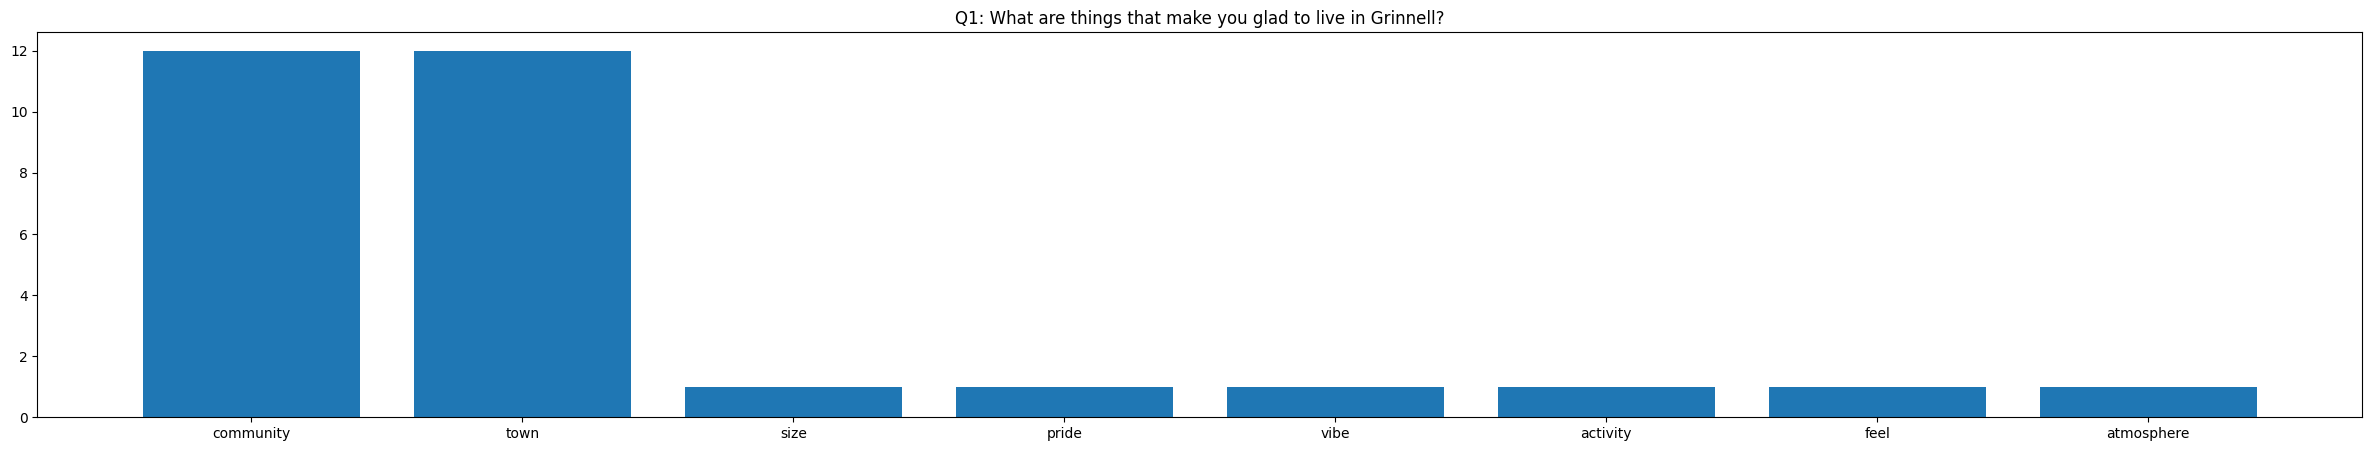

In [137]:
#Nouns count for k mean cluster 1

nounsk1 = noun_str(k_cluster1_response)
nck1 = word_count(nounsk1)
sorted_nouns1 = sorted(nck1.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk1 = dict(sorted_nouns1)
print(dict_sorted_nounsk1)

nouns_resultk1 = {key:value for (key, value) in dict_sorted_nounsk1.items()}

nouns_keyk1 = list(nouns_resultk1.keys())
nouns_countsk1 = list(nouns_resultk1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk1)), nouns_countsk1, tick_label=nouns_keyk1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

 walk place . people friendly . met many friendly , interesting people . Leadership Grinnell seems progressive . diversity student come world , community free event , great playground , walkability town , dog-friendly kid-friendly , knowing neighbor , knowing people stores/pharmacist Mostly nice people , easy get around , feel safe ( except people color ) People . Nice people traffic , mostly friendly people Love small community atmosphere , lack traffic great people . Tight-knit community , friendly people . community event , friendly people , beautiful downtown walkable , nice people , lot tree Friendly people large . Diversity caused college . Various social , art , athletic activity event . lot people calm . Family connection living area . safe . People know get along . good sledding hill . people , small business , art Amazing park especially Ahrens Park , friendly people , lot activity kid , great school , Friendly atmosphere good people college , friendly people , downtown store

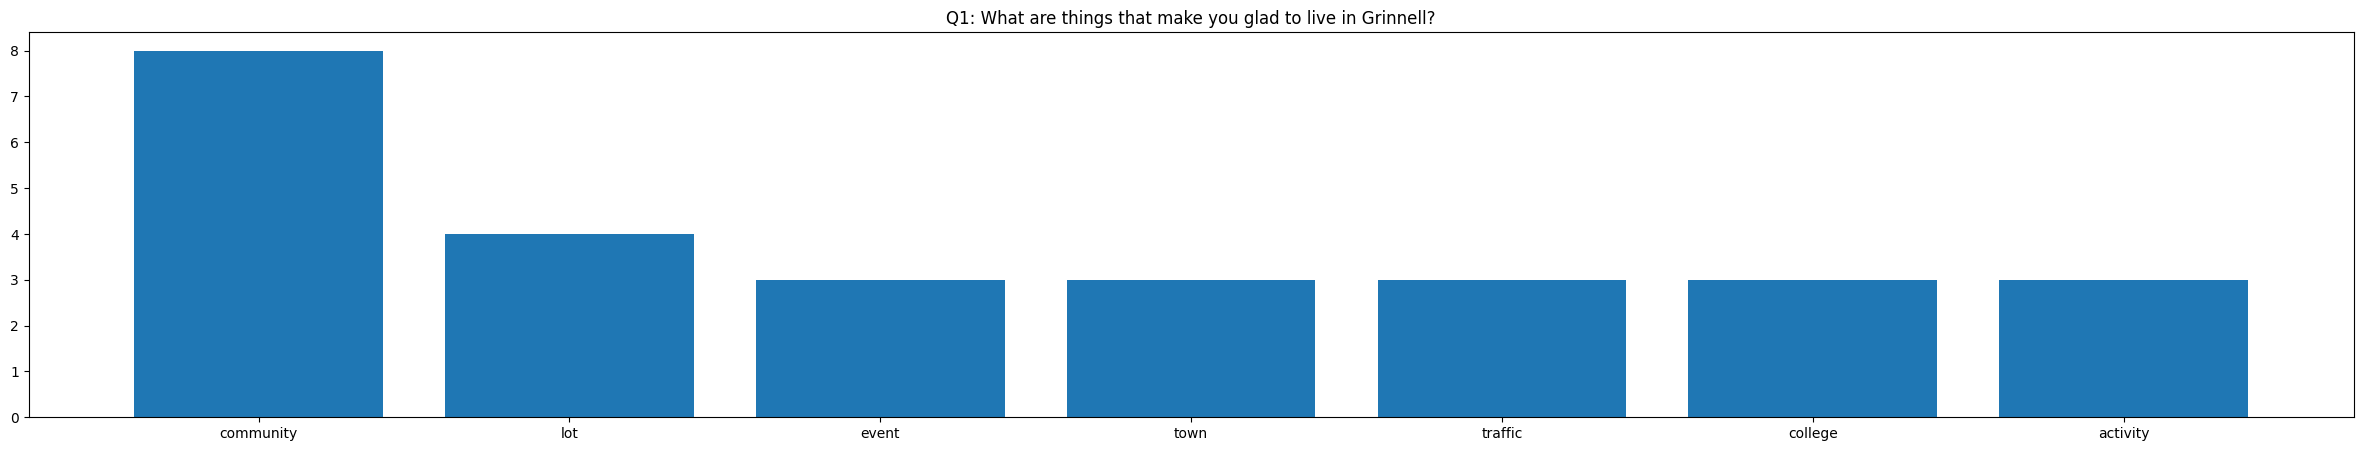

In [161]:
#Nouns count for k mean cluster 0

nounsk0 = noun_str(k_cluster0_response)
nck0 = word_count(nounsk0)
sorted_nouns0 = sorted(nck0.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk0 = dict(sorted_nouns0)
print(dict_sorted_nounsk0)

nouns_resultk0 = {key:value for (key, value) in dict_sorted_nounsk0.items() if value > 2}

nouns_keyk0 = list(nouns_resultk0.keys())
nouns_countsk0 = list(nouns_resultk0.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk0)), nouns_countsk0, tick_label=nouns_keyk0)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'town': 75, 'community': 31, 'size': 23, 'college': 20, 'crime': 12, 'feel': 10, 'business': 9, 'rate': 9, 'park': 9, 'diversity': 8, 'city': 7, 'lot': 7, 'store': 6, 'opportunity': 6, 'population': 6, 'get': 5, 'work': 5, 'living': 5, 'grocery': 4, 'area': 4, 'restaurant': 4, 'activity': 4, 'access': 4, 'neighbor': 4, 'art': 4, 'place': 4, 'safety': 4, 'family': 4, 'school': 4, 'event': 4, 'proximity': 3, 'need': 3, 'downtown': 3, 'option': 3, 'shop': 3, 'program': 3, 'cost': 3, 'traffic': 3, 'movie': 3, 'organization': 3, 'hospital': 3, 'care': 3, 'presence': 2, 'influence': 2, 'music': 2, 'walk': 2, 'everyone': 2, 'nature': 2, 'time': 2, 'help': 2, 'food': 2, 'thing': 2, 'department': 2, 'coffee': 2, 'sense': 2, 'health': 2, 'variety': 2, 'theater': 2, 'accessibility': 2, 'offer': 2, 'distance': 2, 'pool': 2, 'railroad': 2, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'amenity': 1, 'vibe': 1, 'pleasure': 1, 'environment': 1, 'airport': 1, 'contribution': 1, 'locatio

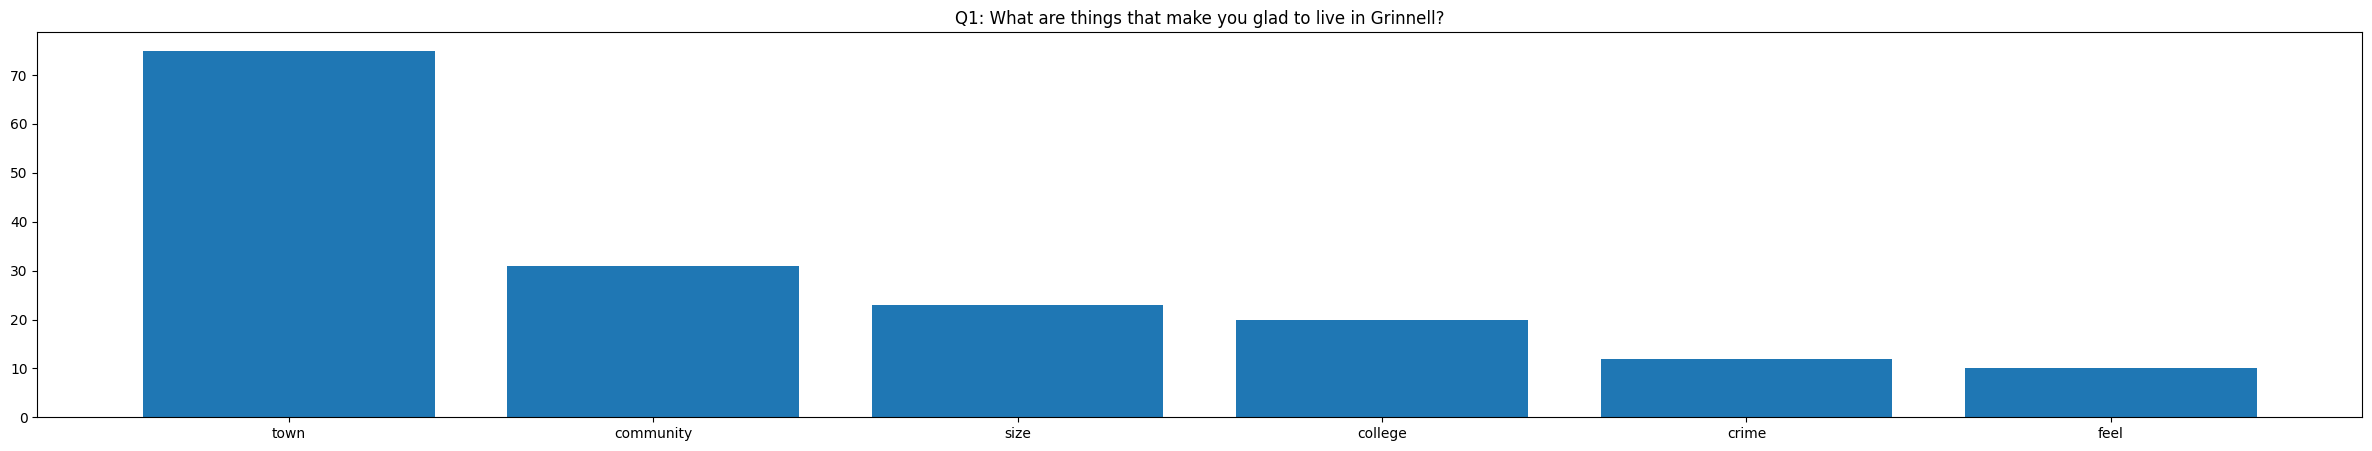

In [139]:
#Nouns count for k mean cluster 2
nounsk2 = noun_str(k_cluster2_response)
nck2 = word_count(nounsk2)
sorted_nouns2 = sorted(nck2.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk2 = dict(sorted_nouns2)
print(dict_sorted_nounsk2)

nouns_resultk2 = {key:value for (key, value) in dict_sorted_nounsk2.items() if value > 9}

nouns_keyk2 = list(nouns_resultk2.keys())
nouns_countsk2 = list(nouns_resultk2.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk2)), nouns_countsk2, tick_label=nouns_keyk2)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'family': 19, 'community': 6, 'friend': 5, 'shop': 3, 'pizza': 3, 'school': 3, 'town': 2, 'restaurant': 2, 'year': 2, 'history': 1, 'sport': 1, 'opportunity': 1, 'farm': 1, 'job': 1, 'neighborhood': 1, 'park': 1, 'lot': 1, 'place': 1, 'life': 1, 'grow': 1, 'grinnell': 1, 'play': 1, 'date': 1, '-Dari': 1, 'cream': 1, 'donut': 1, 'house': 1, '-The': 1, 'wall': 1, 'bell': 1, 'room': 1, 'run': 1, 'sleepover': 1, '-Nobody': 1}


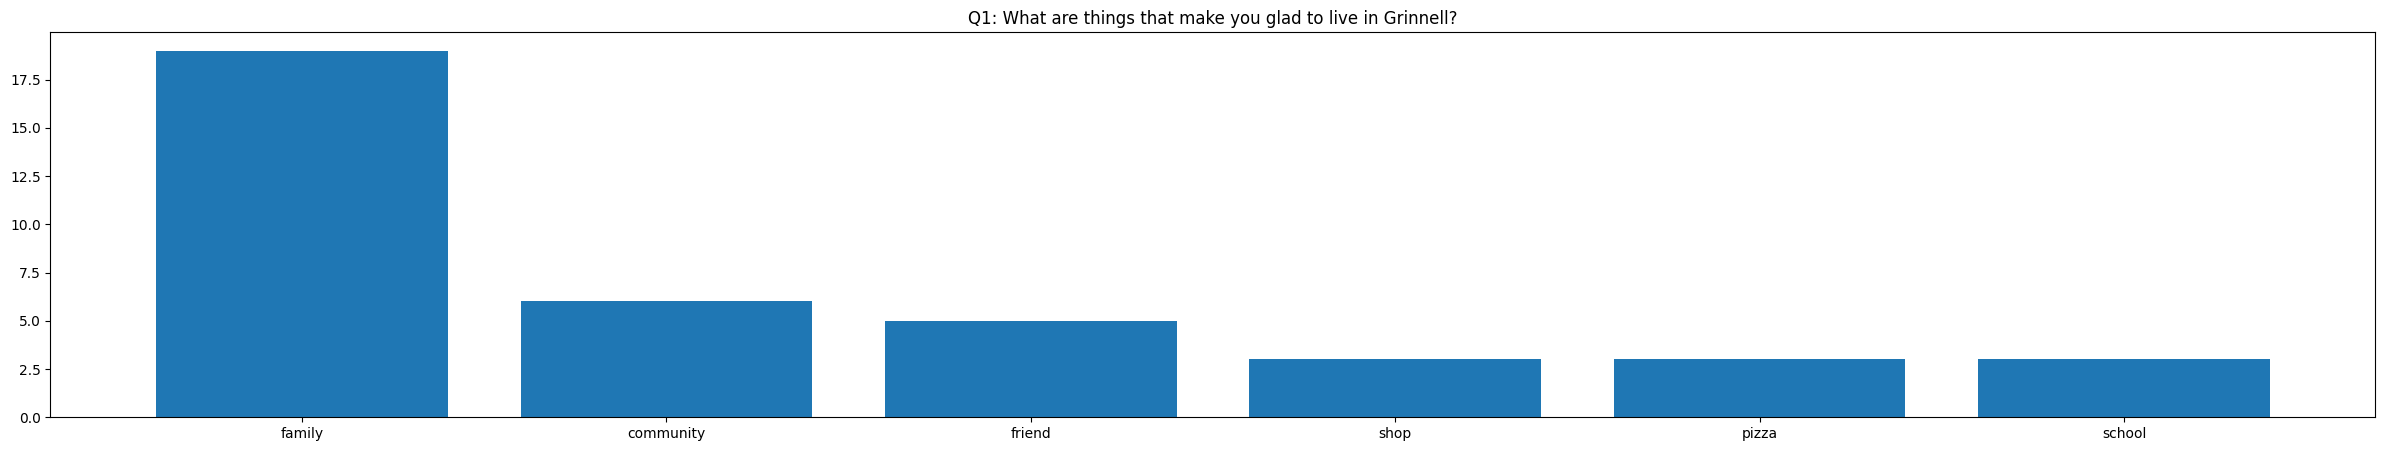

In [140]:
#Nouns count for k mean cluster 3
nounsk3 = noun_str(k_cluster3_response)
nck3 = word_count(nounsk3)
sorted_nouns3 = sorted(nck3.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk3 = dict(sorted_nouns3)
print(dict_sorted_nounsk3)

nouns_resultk3 = {key:value for (key, value) in dict_sorted_nounsk3.items() if value > 2}

nouns_keyk3 = list(nouns_resultk3.keys())
nouns_countsk3 = list(nouns_resultk3.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk3)), nouns_countsk3, tick_label=nouns_keyk3)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

{'community': 88, 'park': 32, 'college': 28, 'town': 25, 'school': 22, 'event': 18, 'opportunity': 17, 'restaurant': 16, 'place': 16, 'downtown': 16, 'size': 14, 'city': 14, 'art': 13, 'lot': 12, 'work': 12, 'market': 12, 'service': 12, 'thing': 12, 'store': 11, 'option': 11, 'farmer': 10, 'access': 10, 'friend': 10, 'resource': 9, 'year': 9, 'time': 9, 'family': 9, 'traffic': 9, 'music': 8, 'activity': 8, 'care': 8, 'business': 8, 'living': 8, 'summer': 7, 'history': 7, 'shop': 7, 'student': 7, 'sense': 7, 'area': 7, 'center': 7, 'diversity': 7, 'crime': 7, 'campus': 7, 'quality': 6, 'library': 6, 'variety': 6, 'home': 6, 'recreation': 6, 'space': 6, 'cost': 6, 'day': 6, 'hospital': 6, 'neighborhood': 5, 'location': 5, 'get': 5, 'neighbor': 5, 'life': 5, 'distance': 5, 'need': 5, 'job': 5, 'housing': 4, 'everyone': 4, 'drive': 4, 'facility': 4, 'help': 4, 'commute': 4, 'group': 4, 'movie': 4, 'safety': 4, 'member': 4, 'retirement': 4, 'everything': 4, 'museum': 4, 'walkability': 4, 'f

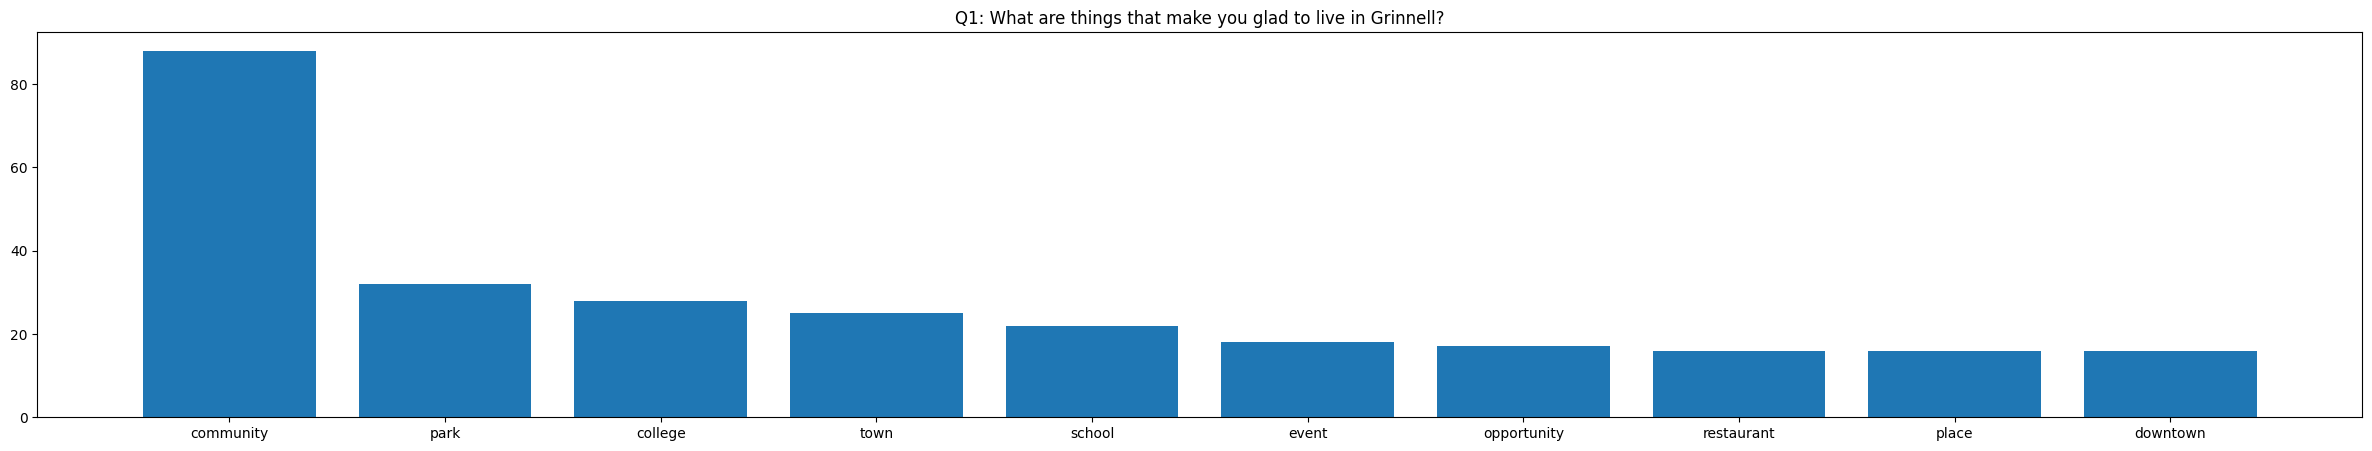

In [141]:
#Nouns count for k mean cluster 4
nounsk4 = noun_str(k_cluster4_response)
nck4 = word_count(nounsk4)
sorted_nouns4 = sorted(nck4.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk4 = dict(sorted_nouns4)
print(dict_sorted_nounsk4)

nouns_resultk4 = {key:value for (key, value) in dict_sorted_nounsk4.items() if value > 15}

nouns_keyk4 = list(nouns_resultk4.keys())
nouns_countsk4 = list(nouns_resultk4.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk4)), nouns_countsk4, tick_label=nouns_keyk4)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

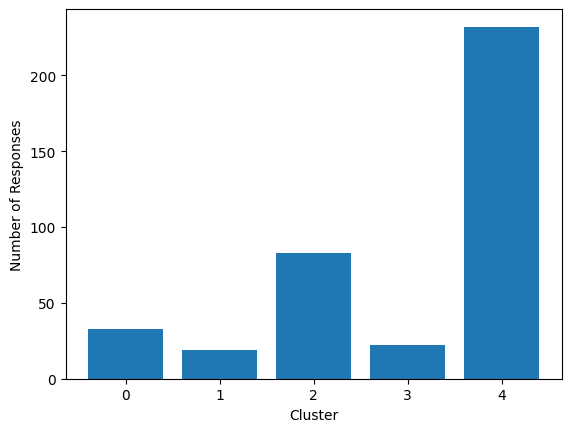

In [142]:
import matplotlib.pyplot as plt

# Create histogram showing cluster sizes
cluster_sizes = [sum(labels == i) for i in range(kmeans.n_clusters)]
plt.bar(range(kmeans.n_clusters), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Number of Responses')
plt.show()


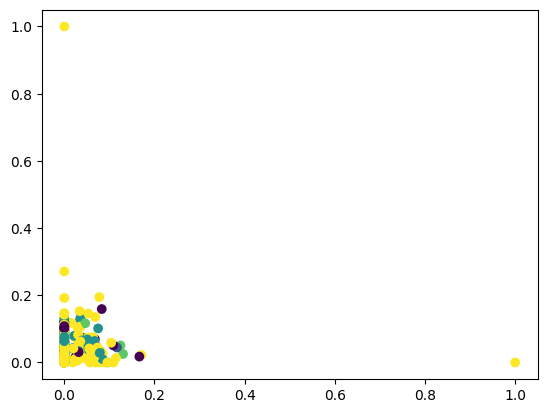

In [143]:
import matplotlib.pyplot as plt

# visualize the clustering results
plt.scatter(cosine_sim[:, 0], cosine_sim[:, 1], c=kmeans.labels_)
plt.show()

#do pca to find axis. the derived dimensioin captures where there is maximal variation between data points
# dimension where there is most variation
# number of pca is the same as no. of variables

#get a rotation matrix

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# calculate the pairwise distance matrix
distance_matrix = 1 - np.array(cosine_similarity(vectors))

# apply agglomerative clustering
Z = linkage(distance_matrix, method='ward')
labels = fcluster(Z, t=6, criterion='maxclust')



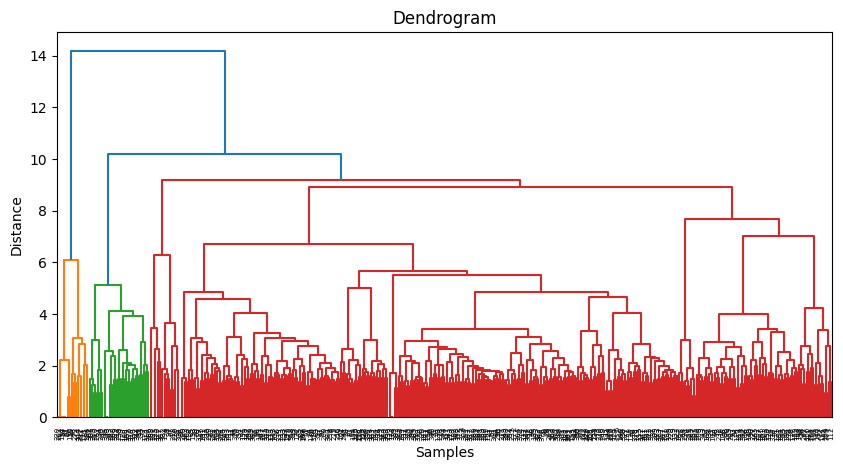

In [145]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# create dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)

# add labels to the plot
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

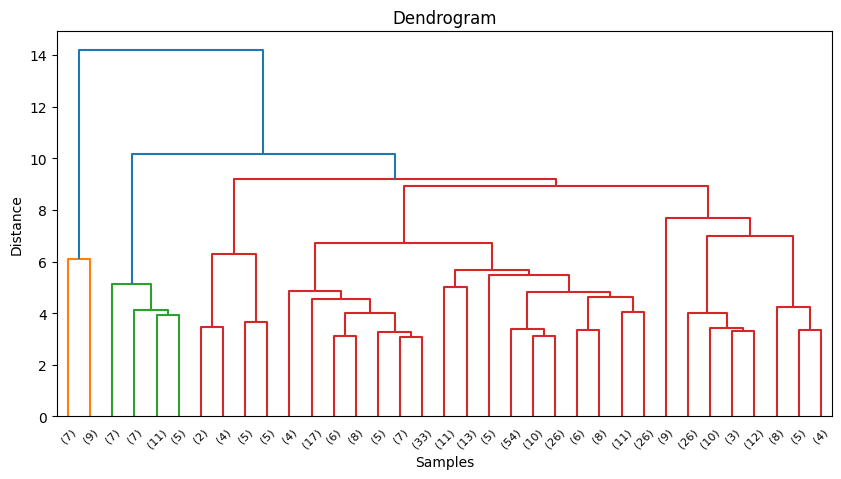

In [146]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# create dendrogram
fig = plt.figure(figsize=(10, 5))
#truncated to 35 responses
dn = dendrogram(Z, truncate_mode='lastp', p=35)

# add labels to the plot
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [147]:
first = responses.iloc[:, 1].dropna().tolist()

# create a dictionary to store the responses in each cluster
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)

# print the responses in each cluster
for label, first in clusters.items():
    print(f"Cluster {label}:")
    print(first)
    print()

Cluster 4:
[0, 1, 2, 4, 5, 6, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 27, 28, 29, 30, 32, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 57, 58, 60, 61, 65, 66, 69, 71, 73, 74, 75, 76, 80, 82, 83, 84, 86, 88, 89, 92, 93, 94, 95, 96, 99, 102, 104, 105, 107, 108, 109, 111, 115, 118, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 151, 152, 153, 154, 157, 158, 161, 162, 163, 166, 168, 171, 172, 174, 176, 177, 178, 179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 195, 196, 197, 199, 200, 204, 208, 209, 212, 213, 215, 216, 217, 219, 222, 223, 228, 230, 233, 235, 236, 237, 238, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 258, 259, 260, 263, 267, 269, 270, 273, 275, 276, 277, 278, 279, 280, 281, 283, 285, 287, 289, 291, 293, 294, 296, 297, 298, 299, 301, 302, 303, 304, 306, 309, 312, 313, 314, 315, 318, 319, 320, 321, 323, 324, 325, 326, 327, 328, 333, 337, 338, 339, 341, 346, 347

In [165]:
records2 = responses.iloc[:, 2].dropna()


# extract the text data from the "text" column
text_data2 = records2.values

text_data2 = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]) for text in text_data2]    
#https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
#https://okan.cloud/posts/2022-01-16-text-vectorization-using-python-tf-idf/

# transform text data into numerical vector
vectors2 = vectorizer.fit_transform(text_data2)

cosine_sim2 = cosine_similarity(vectors2)

# cluster the data based on cosine similarity
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(cosine_sim2)

# Print the cluster labels for each response
labels2 = kmeans2.labels_

# create a dictionary to store the responses in each cluster
k_clusters2 = {}
for i, label in enumerate(labels2):
    if label not in k_clusters2:
        k_clusters2[label] = []
    k_clusters2[label].append(i)

# print the responses in each cluster
for label, first in k_clusters2.items():
    print(f"Cluster {label}:")
    print(first)
    print()

['Restaurant closure , lack communication , cooperation among various group , POW I80 ineffective inactive , shared direction addressed .', 'nice restaurant choice . Road repair ( finishing ) taking long . place eat Monday night ! Gas price !', 'Grinnell College Ahrens Park .', 'able dine purchase item without travel order online', 'people .', 'Watching partnership take place community .', 'Good quality local restaurant . Public event . variety local shopping option .', 'Sporting event , able work right town .', 'Availability park , path , shop , people . Great organization trying hard improve thing .', 'people meet .', 'Helping others ministry . Always plenty activity want participate .', 'pothole occasionally fixed least patched .', 'availability resource ( ex . medical , shopping/walmart ) , small-town convenience , fellow student', 'Walk-ability', 'Green space , low crime , relatively quiet', 'Grinnell , several time week , love cleanliness beauty town .', 'Sense security ; store w

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [166]:
#Cluster 
k_cluster0_response = ''
for response in k_clusters2[0]:
    k_cluster0_response += " " 
    k_cluster0_response += text_data[response]
    
#Cluster 1
k_cluster1_response = ''
for response in k_clusters2[1]:
    k_cluster1_response += " " 
    k_cluster1_response += text_data[response]
 
#k_Cluster 2
k_cluster2_response = ''
for response in k_clusters2[2]:
    k_cluster2_response += " " 
    k_cluster2_response += text_data[response]

#k_Cluster 3
k_cluster3_response = ''
for response in k_clusters2[3]:
    k_cluster3_response += " " 
    k_cluster3_response += text_data[response]

#k_Cluster 4
k_cluster4_response = ''
for response in k_clusters2[4]:
    k_cluster4_response += " " 
    k_cluster4_response += text_data[response]

{'community': 93, 'town': 73, 'college': 38, 'park': 31, 'size': 26, 'family': 20, 'school': 18, 'event': 17, 'place': 17, 'city': 15, 'opportunity': 15, 'lot': 14, 'restaurant': 14, 'business': 14, 'art': 14, 'crime': 14, 'diversity': 13, 'work': 13, 'service': 12, 'store': 11, 'market': 11, 'access': 11, 'downtown': 11, 'activity': 10, 'year': 10, 'get': 10, 'living': 10, 'time': 9, 'feel': 9, 'option': 9, 'rate': 9, 'shop': 8, 'music': 8, 'farmer': 8, 'area': 8, 'traffic': 8, 'friend': 8, 'summer': 7, 'resource': 7, 'history': 7, 'library': 7, 'thing': 7, 'sense': 6, 'care': 6, 'need': 6, 'movie': 6, 'quality': 6, 'distance': 6, 'day': 6, 'grocery': 5, 'program': 5, 'neighbor': 5, 'center': 5, 'population': 5, 'cost': 5, 'church': 5, 'project': 4, 'facility': 4, 'presence': 4, 'help': 4, 'safety': 4, 'life': 4, 'variety': 4, 'building': 4, 'everything': 4, 'hospital': 4, 'recreation': 4, 'health': 4, 'neighborhood': 4, 'job': 4, 'prairie': 4, 'grinnell': 4, 'campus': 4, 'housing': 3

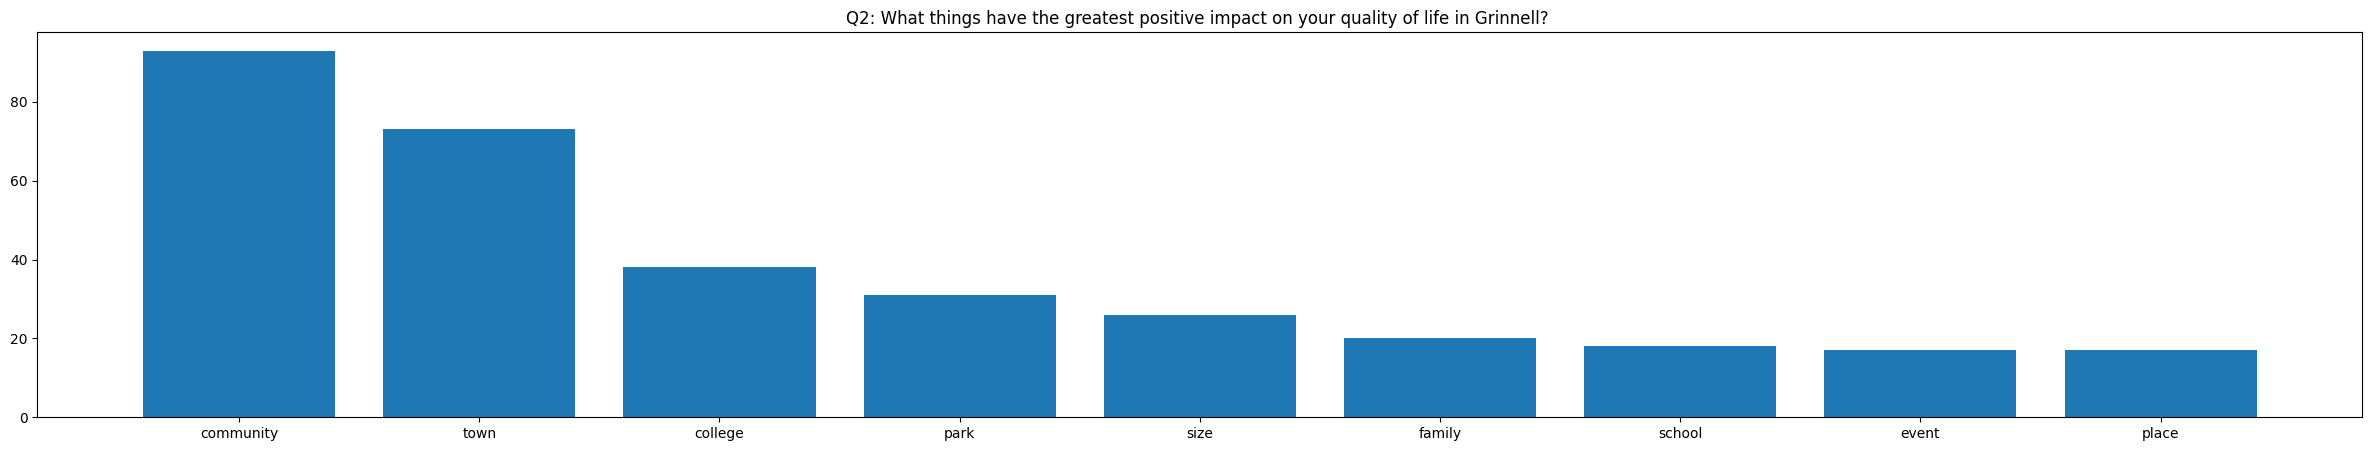

In [169]:
#Nouns count for k mean cluster 0

nounsk0 = noun_str(k_cluster0_response)
nck0 = word_count(nounsk0)
sorted_nouns0 = sorted(nck0.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk0 = dict(sorted_nouns0)
print(dict_sorted_nounsk0)

nouns_resultk0 = {key:value for (key, value) in dict_sorted_nounsk0.items() if value > 15}

nouns_keyk0 = list(nouns_resultk0.keys())
nouns_countsk0 = list(nouns_resultk0.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk0)), nouns_countsk0, tick_label=nouns_keyk0)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell? ")
plt.show()

{'community': 19, 'town': 16, 'family': 7, 'school': 7, 'size': 5, 'traffic': 5, 'work': 4, 'place': 4, 'friend': 4, 'student': 4, 'activity': 4, 'living': 4, 'crime': 4, 'park': 4, 'thing': 4, 'restaurant': 4, 'bike': 3, 'event': 3, 'neighbor': 3, 'resource': 3, 'downtown': 3, 'cost': 3, 'rate': 3, 'number': 3, 'college': 3, 'lot': 3, 'opportunity': 3, 'store': 3, 'art': 3, 'shop': 3, 'pizza': 3, 'access': 2, 'diversity': 2, 'world': 2, 'commute': 2, 'location': 2, 'charm': 2, 'lack': 2, 'everyone': 2, 'amenity': 2, 'city': 2, 'need': 2, 'drive': 2, 'address': 2, 'museum': 2, 'team': 2, 'theater': 2, 'business': 2, 'home': 2, 'feel': 2, 'area': 2, 'type': 2, 'food': 2, 'willingness': 2, 'decor': 2, 'holiday': 2, 'decoration': 2, 'collaboration': 1, 'visit': 1, 'exercise': 1, 'enjoy': 1, 'talk': 1, 'speaker': 1, 'department': 1, 'playground': 1, 'walkability': 1, 'entertainment': 1, 'option': 1, 'cosmopolitan': 1, 'influence': 1, 'group': 1, 'center': 1, 'history': 1, 'proximity': 1, '

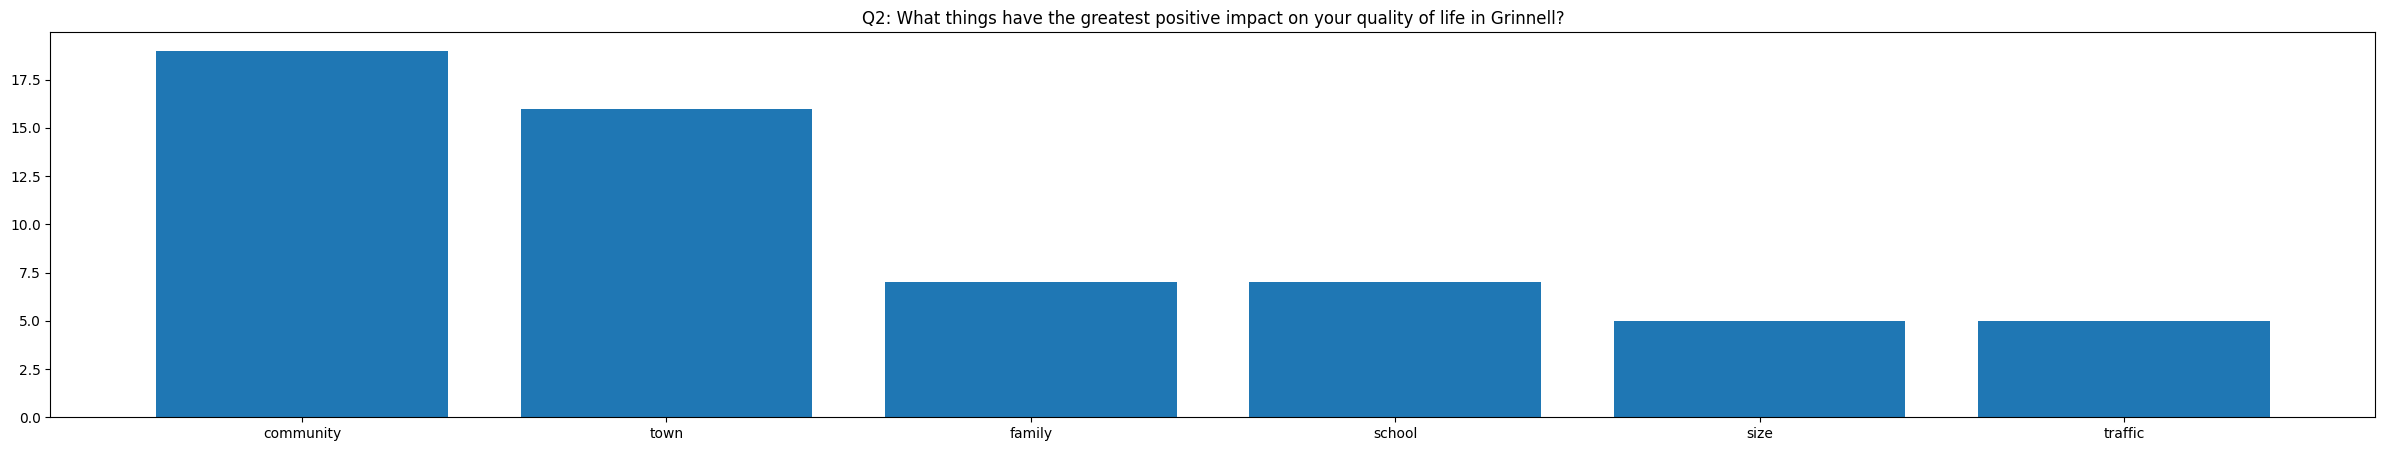

In [172]:
#Nouns count for k mean cluster 1

nounsk1 = noun_str(k_cluster1_response)
nck1 = word_count(nounsk1)
sorted_nouns1 = sorted(nck1.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk1 = dict(sorted_nouns1)
print(dict_sorted_nounsk1)

nouns_resultk1 = {key:value for (key, value) in dict_sorted_nounsk1.items() if value > 4}

nouns_keyk1 = list(nouns_resultk1.keys())
nouns_countsk1 = list(nouns_resultk1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk1)), nouns_countsk1, tick_label=nouns_keyk1)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

{'community': 20, 'town': 6, 'opportunity': 5, 'city': 4, 'farmer': 3, 'size': 3, 'event': 3, 'family': 3, 'option': 3, 'college': 3, 'hospital': 3, 'recreation': 2, 'school': 2, 'restaurant': 2, 'accessibility': 2, 'market': 2, 'thing': 2, 'crime': 2, 'quality': 1, 'neighborhood': 1, 'get': 1, 'color': 1, 'close': 1, 'spirit': 1, 'neighbor': 1, 'turn': 1, 'calendar': 1, 'space': 1, 'park': 1, 'walk': 1, 'ride': 1, 'bike': 1, 'access': 1, 'month': 1, 'vibe': 1, 'activity': 1, 'member': 1, 'shopping': 1, 'population': 1, 'location': 1, 'relationship': 1, 'football': 1, 'field': 1, 'time': 1, 'availability': 1, 'restaurants/food': 1, 'need': 1, 'hyvee': 1, 'sport': 1, 'violence': 1, 'sense': 1, 'support': 1, 'theater': 1, 'parade': 1, 'etc': 1, 'area': 1, 'store': 1, 'business': 1, 'safety': 1, 'strength': 1, 'doctor': 1, 'downtown': 1, 'lot': 1, 'place': 1, 'retire': 1, 'establishment': 1, 'rate': 1, 'countryside': 1, 'Rate': 1, 'feel': 1, 'variety': 1, 'job': 1, 'teen': 1, 'influence':

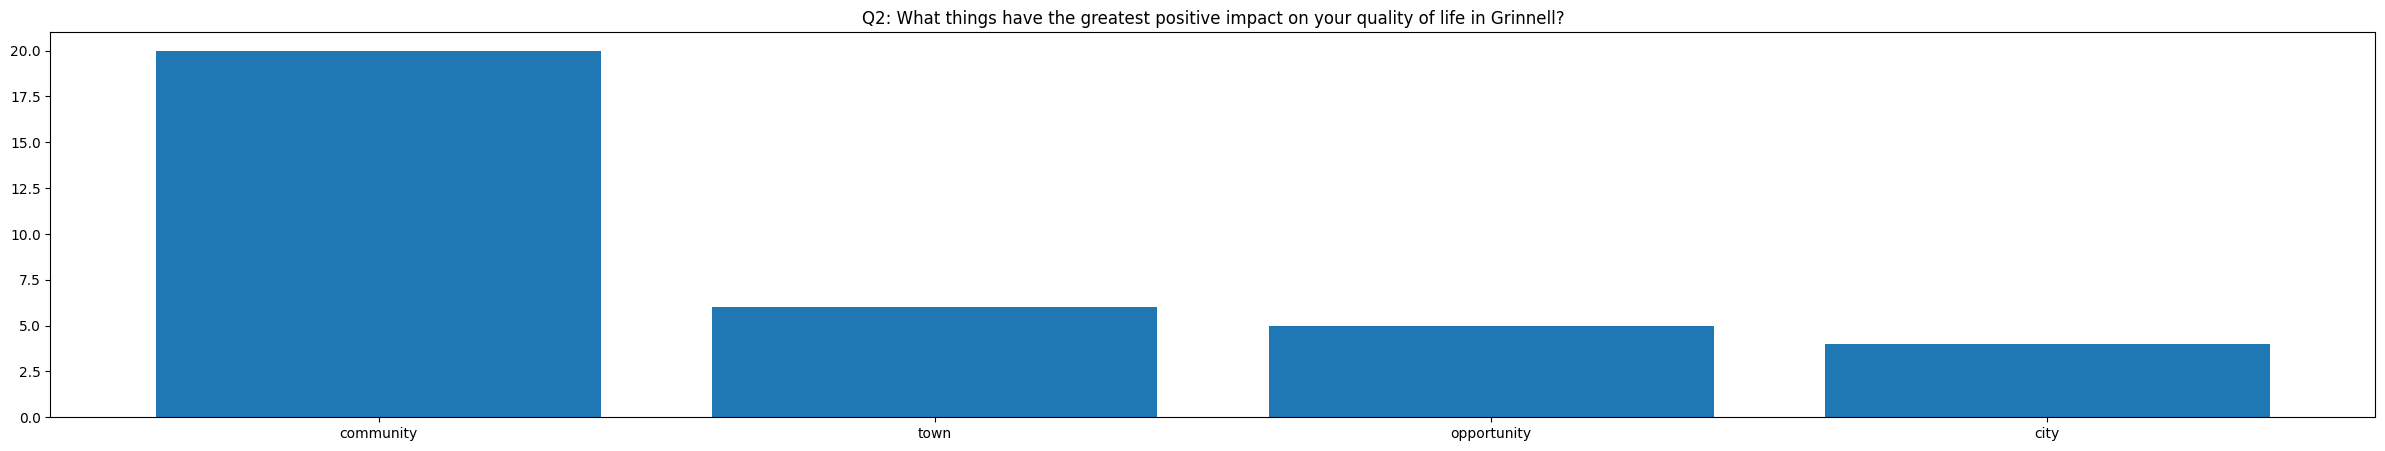

In [174]:
#Nouns count for k mean cluster 2

nounsk2 = noun_str(k_cluster2_response)
nck2 = word_count(nounsk2)
sorted_nouns2 = sorted(nck2.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk2 = dict(sorted_nouns2)
print(dict_sorted_nounsk2)

nouns_resultk2 = {key:value for (key, value) in dict_sorted_nounsk2.items() if value > 3}

nouns_keyk2 = list(nouns_resultk2.keys())
nouns_countsk2 = list(nouns_resultk2.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk2)), nouns_countsk2, tick_label=nouns_keyk2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

{'community': 6, 'town': 6, 'park': 5, 'care': 4, 'size': 3, 'variety': 2, 'sense': 2, 'retirement': 2, 'business': 2, 'music': 2, 'school': 2, 'downtown': 2, 'option': 1, 'service': 1, 'resident': 1, 'lot': 1, 'perfect': 1, 'band': 1, 'restaurant': 1, 'facilities/care': 1, 'center': 1, 'population': 1, 'everyone': 1, 'take': 1, 'part': 1, 'offering': 1, 'grocery': 1, 'store': 1, 'organization': 1, 'get': 1, 'activity': 1, 'feel': 1, 'something': 1, 'fitting': 1, 'decoration': 1, 'commute': 1, 'coffee': 1, 'shop': 1, 'art': 1, 'program': 1, 'nature': 1, 'cleanliness': 1, 'house': 1, 'friend': 1, 'agriculture': 1, 'group': 1, 'theatre': 1, 'church': 1, 'job': 1, 'meal': 1, 'college': 1, 'awareness': 1, 'history': 1, 'peace': 1, 'home': 1, 'space': 1, 'individual': 1, 'hospital': 1, 'doctor': 1, 'health': 1, 'professional': 1, 'earth': 1, 'sky': 1, 'traffic': 1, 'city/school': 1}


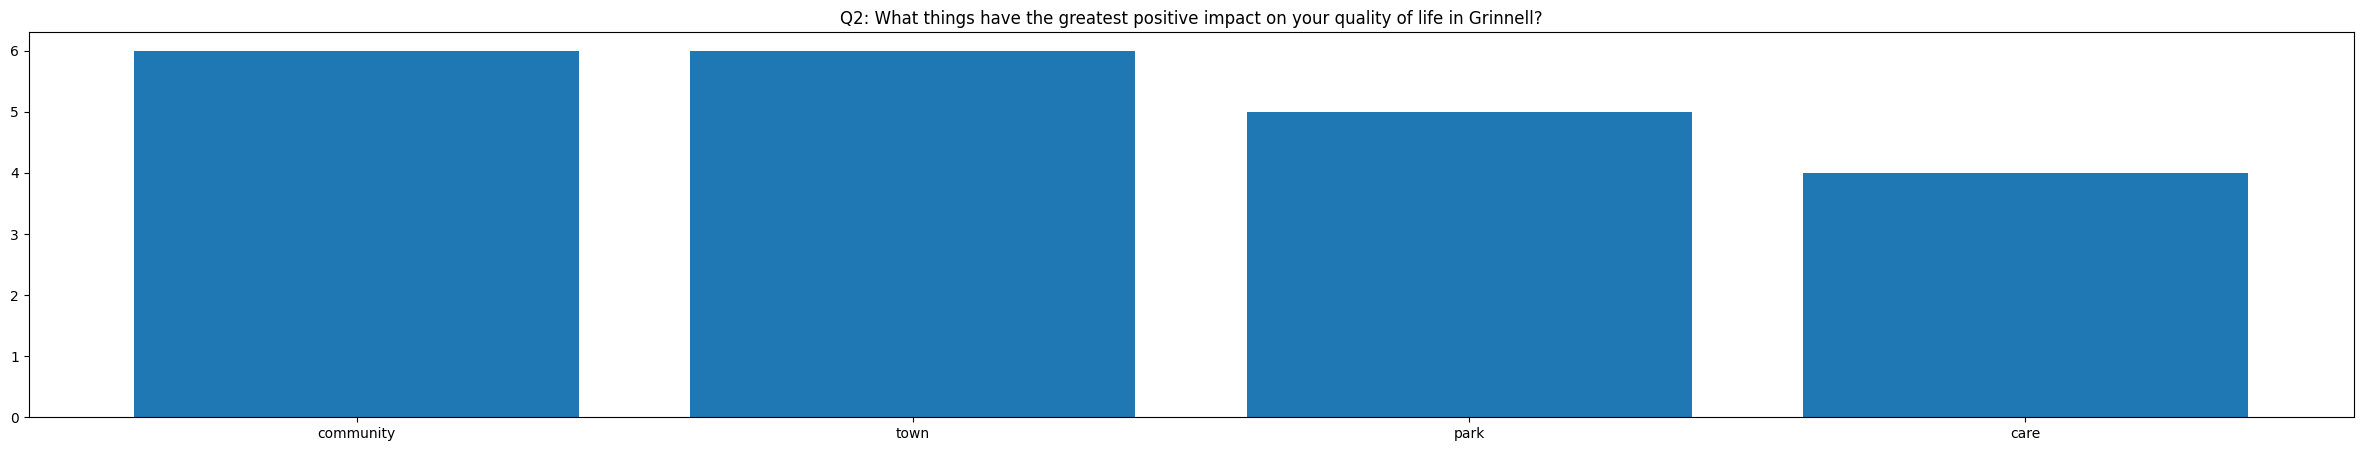

In [175]:
#Nouns count for k mean cluster 3

nounsk3 = noun_str(k_cluster3_response)
nck3 = word_count(nounsk3)
sorted_nouns3 = sorted(nck3.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk3 = dict(sorted_nouns3)
print(dict_sorted_nounsk3)

nouns_resultk3 = {key:value for (key, value) in dict_sorted_nounsk3.items() if value > 3}

nouns_keyk3 = list(nouns_resultk3.keys())
nouns_countsk3 = list(nouns_resultk3.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk3)), nouns_countsk3, tick_label=nouns_keyk3)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

{'town': 6, 'community': 2, 'proximity': 2, 'everyone': 2, 'college': 1, 'energy': 1, 'expectation': 1, 'employer': 1, 'retailer': 1, 'safety': 1, 'park': 1, 'population': 1, 'care': 1, 'help': 1, 'map': 1, 'kind': 1, 'neighbor': 1, 'traffic': 1, 'housing': 1, 'price': 1, 'vibrant': 1, 'walkability': 1, 'family': 1, 'diversity': 1, 'size': 1, 'restaurant': 1, 'location': 1, 'culture': 1, 'fact': 1, 'lot': 1, 'offer': 1, 'event': 1, 'work': 1, 'school': 1, 'neighborhood': 1, 'environment': 1}


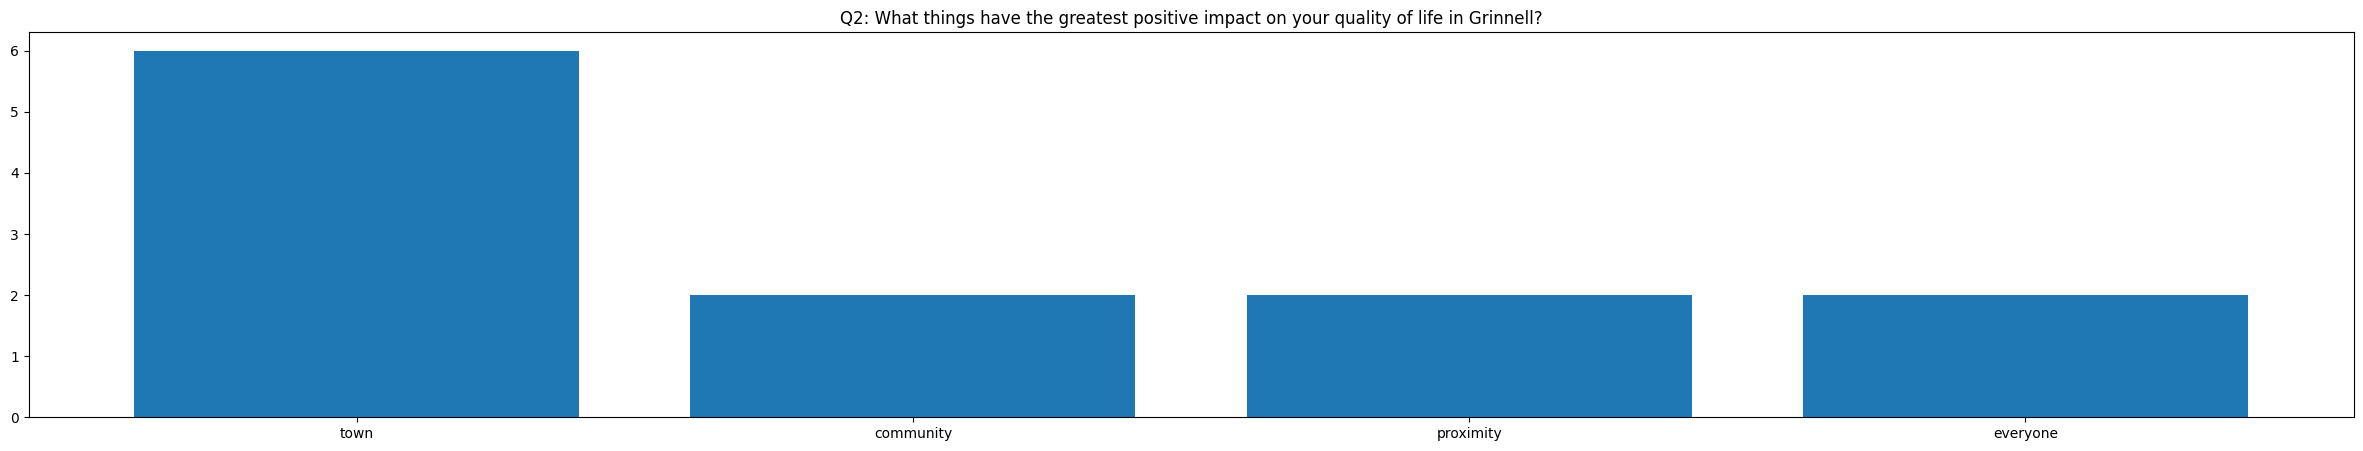

In [177]:
#Nouns count for k mean cluster 4

nounsk4 = noun_str(k_cluster4_response)
nck4 = word_count(nounsk4)
sorted_nouns4 = sorted(nck4.items(), key=lambda x:x[1], reverse=True)
dict_sorted_nounsk4 = dict(sorted_nouns4)
print(dict_sorted_nounsk4)

nouns_resultk4 = {key:value for (key, value) in dict_sorted_nounsk4.items() if value > 1}

nouns_keyk4 = list(nouns_resultk4.keys())
nouns_countsk4 = list(nouns_resultk4.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(nouns_resultk4)), nouns_countsk4, tick_label=nouns_keyk4)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()